### Prediction using supervised ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Reading data from the link 
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


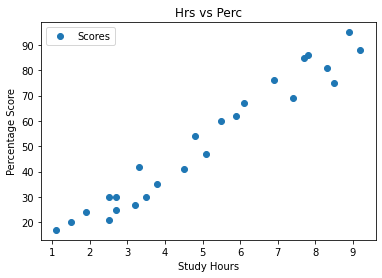

In [19]:
df.plot(x = 'Hours',y = 'Scores',style = 'o')
plt.title('Hrs vs Perc')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.show()

#### shape of dataset

In [21]:
df.shape

(25, 2)

In [23]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### divide data into "attributes" and "labels"

In [46]:
df.iloc[:, :-1].head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [70]:
df.iloc[:,0].values[:5] # all rows, 0th column
# df.iloc[:, :-1].values[:5]

array([2.5, 5.1, 3.2, 8.5, 3.5])

In [68]:
df.iloc[:,1].values[:5] # all rows, 1st column

array([21, 47, 27, 75, 30])

In [87]:
x = df.iloc[:, :-1].values #saving artributes
y = df.iloc[:,1].values # saving labels

####  Split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [88]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 
#test_size = 0.2 means 20% to test data, 80% to train

## Training the Algorithm
Using Linear Regression as the data is continious

In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("==============================> \nTraining complete")

==============================> 
Training complete


In [94]:
#y = mx + b
print(f'goodness of fit :{model.score(X_train, y_train)}')
print(f'intercept : {model.intercept_}') # b
print(f'slop : {model.coef_}') #m

goodness of fit :0.9515510725211552
intercept : 2.018160041434662
slop : [9.91065648]


In [95]:
#To plot line using pyplot we need artribute and line
#plt.plot(x, m*x + b)

In [96]:
# y = m * x + b
line  = model.coef_ * x + model.intercept_

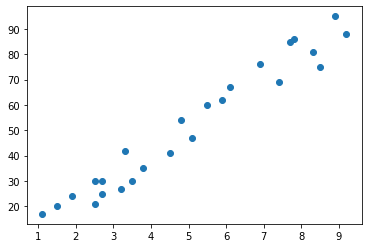

In [97]:
plt.scatter(x,y) #only scatter plot

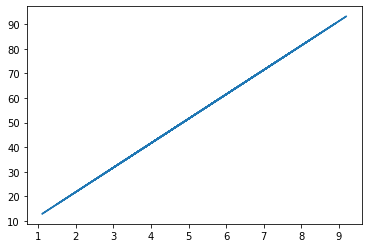

In [98]:
plt.plot(x,line)

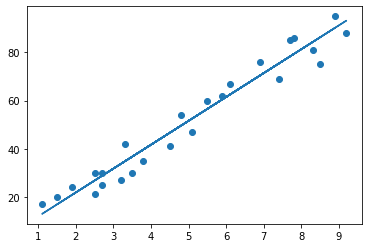

In [101]:
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

## Making Prediction

predictoin using trained model

In [102]:
y_predict = model.predict(X_test)

In [119]:
X_test.shape

(5, 1)

In [121]:
df_predict = pd.DataFrame({'study ours':X_test.reshape(5,),'Actual':y_test,'Predicted': y_predict})
df_predict

,study ours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [113]:
#predicting some random score
hours = 8.4
print(f'number studey hours : {hours}')
print(f'prediced score : {model.predict(np.reshape(hours,(-1,1)))}')

number studey hours : 8.4
prediced score : [85.26767448]


### Evaluating the model
Using mean square error

In [122]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict) #true ,predicted

21.598769307217456

Mean absolute Error

In [123]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predict)

4.183859899002982